<a href="https://colab.research.google.com/github/ersaayan/age-gender-detection/blob/main/train_age_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 198, 198, 128)     3584      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 98, 98, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 96, 96, 128)       147584    
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 47, 47, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 45, 45, 256)       295168    
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 22, 22, 256)      

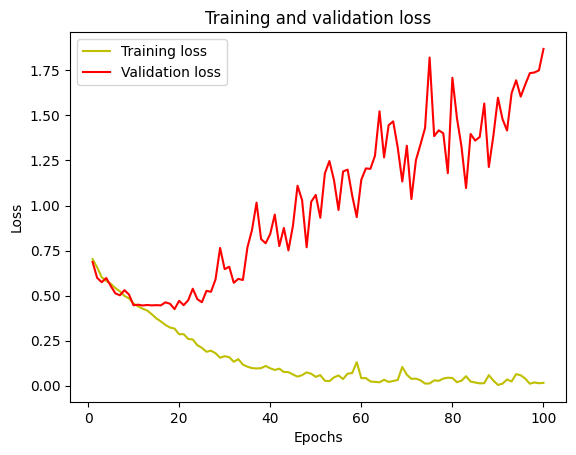

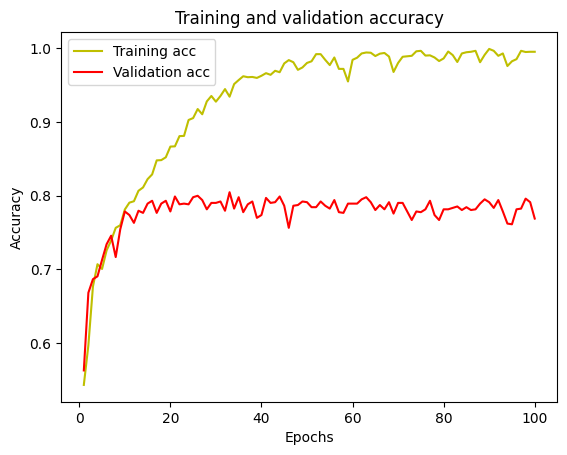

33/33 [==============================] - 1s 13ms/step
Accuracy =  0.5735009671179884


<Axes: >

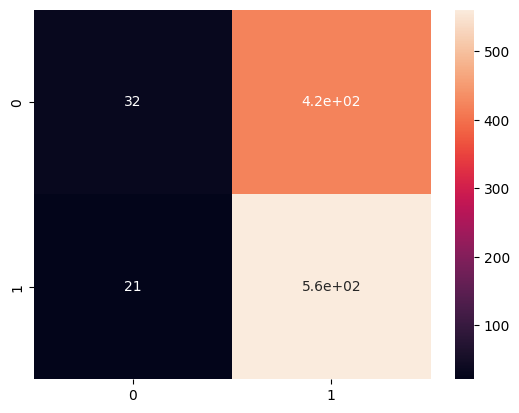

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential, load_model, Model
from keras.layers import (
    Conv2D,
    MaxPool2D,
    Dense,
    Dropout,
    BatchNormalization,
    Flatten,
    Input,
)
from sklearn.model_selection import train_test_split

path = "/content/drive/MyDrive/UTKFace/"
images = []
age = []
gender = []
for img in os.listdir(path):
    ages = img.split("_")[0]
    genders = img.split("_")[1]
    img = cv2.imread(str(path) + "/" + str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0
    images.append(np.array(img))
    age.append(np.array(ages))
    gender.append(np.array(genders))

age = np.array(age,dtype=np.int64)
images = np.array(images)
gender = np.array(gender,np.uint64)

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(
    images, age, random_state=42
)

x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(
    images, gender, random_state=42
)

##################################
# Define age model and train.
##################################

age_model = Sequential()
age_model.add(Conv2D(128, kernel_size=3, activation="relu", input_shape=(200, 200, 3)))
# age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(128, kernel_size=3, activation="relu"))
# age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(256, kernel_size=3, activation="relu"))
# age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(512, kernel_size=3, activation="relu"))
# age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Flatten())
age_model.add(Dropout(0.2))
age_model.add(Dense(512, activation="relu"))

age_model.add(Dense(1, activation="linear", name="age"))

age_model.compile(optimizer="adam", loss="mse", metrics=["mae"])
print(age_model.summary())

history_age = age_model.fit(
    x_train_age, y_train_age, validation_data=(x_test_age, y_test_age), epochs=100
)

age_model.save("age_model_100epochs.keras")

################################################################
# Define gender model and train
##################################################
gender_model = Sequential()

gender_model.add(
    Conv2D(36, kernel_size=3, activation="relu", input_shape=(200, 200, 3))
)

gender_model.add(MaxPool2D(pool_size=3, strides=2))
gender_model.add(Conv2D(64, kernel_size=3, activation="relu"))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(128, kernel_size=3, activation="relu"))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(256, kernel_size=3, activation="relu"))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(512, kernel_size=3, activation="relu"))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Flatten())
gender_model.add(Dropout(0.2))
gender_model.add(Dense(512, activation="relu"))
gender_model.add(Dense(1, activation="sigmoid", name="gender"))

gender_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history_gender = gender_model.fit(
    x_train_gender,
    y_train_gender,
    validation_data=(x_test_gender, y_test_gender),
    epochs=100,
)

gender_model.save("gender_model_100epochs.keras")


############################################################

history = history_gender

# plot the training and validation accuracy and loss at each epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "y", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# acc = history.history['accuracy']
val_acc = history.history["val_accuracy"]
# val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, "y", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

####################################################################
from keras.models import load_model

# Test the model
my_model = load_model("age_model_100epochs.keras", compile=False)


predictions = my_model.predict(x_test_gender)
y_pred = (predictions >= 0.5).astype(int)[:, 0]

from sklearn import metrics

print("Accuracy = ", metrics.accuracy_score(y_test_gender, y_pred))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_gender, y_pred)
sns.heatmap(cm, annot=True)
